<a href="https://colab.research.google.com/github/ndtuan10/DeepLearning_CS431.L21.KHCL/blob/main/BaiTap/BaiTap6/BaiTap6_Sentiment-Analysis_LSTM%2BFoodyReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **B√ÄI T·∫¨P 6**

**M√¥n : C√°c k·ªπ thu·∫≠t h·ªçc s√¢u v√† ·ª©ng d·ª•ng - CS431.L21.KHCL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Ph√¢n t√≠ch c·∫£m x√∫c v·ªõi LSTMs**

Trong assignment n√†y, ch√∫ng ta s·∫Ω d√πng m·∫°ng LSTM ƒë·ªÉ gi·∫£i quy·∫øt b√†i to√°n ph√¢n t√≠ch c·∫£m x√∫c (Sentiment Analysis) tr√™n t·∫≠p d·ªØ li·ªáu vƒÉn b·∫£n. N·∫øu nh√¨n theo ki·ªÉu black box, ƒë·∫ßu v√†o c·ªßa b√†i to√°n l√† m·ªôt c√¢u ho·∫∑c ƒëo·∫°n vƒÉn b·∫£n v√† ƒë·∫ßu ra l√† tr·∫°ng th√°i t√≠ch c·ª±c, ti√™u c·ª±c hay trung ho√† (positive - negative - neutral). Trong ph·∫°m vi c·ªßa assignment n√†y, ch√∫ng ta ch·ªâ quan t√¢m ƒë·∫øn hai tr·∫°ng th√°i c·∫£m x√∫c l√† positive v√† negative.

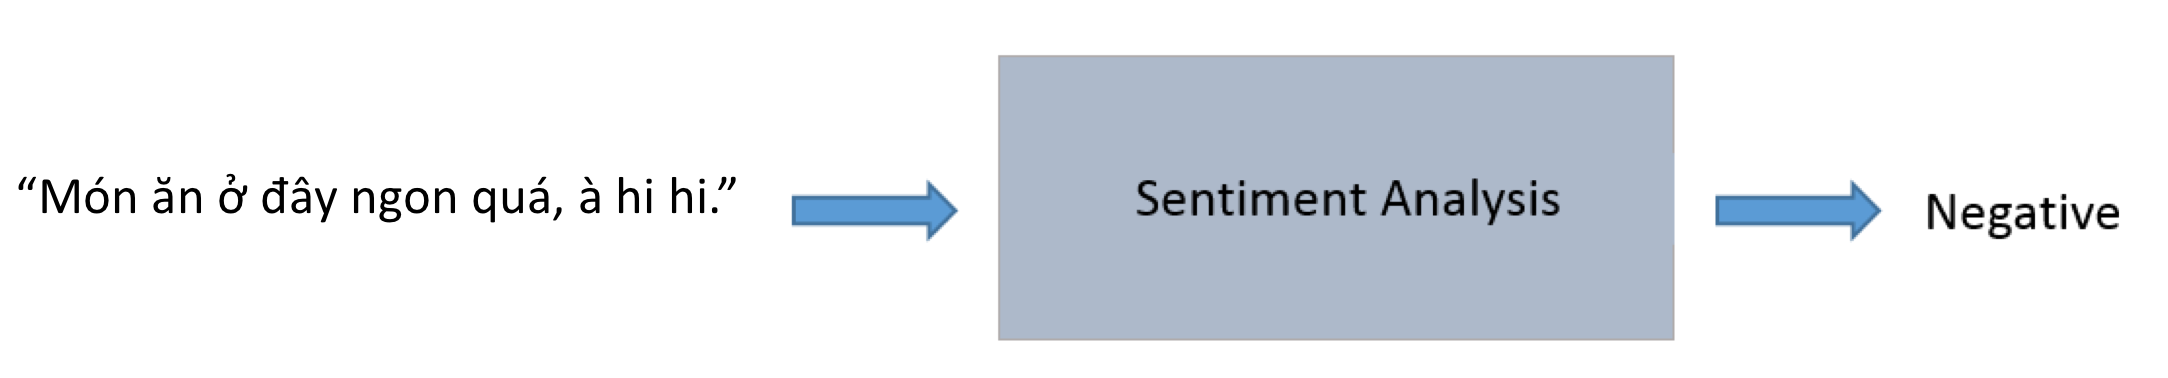

# **G√≥c nh√¨n Word Vectors**

N·∫øu nh∆∞ ch√∫ng ta gi·ªØ nguy√™n ƒë·ªãnh d·∫°ng ƒë·∫ßu v√†o l√† chu·ªói k√Ω t·ª± th√¨ r·∫•t kh√≥ ƒë·ªÉ th·ª±c hi·ªán c√°c thao t√°c bi·∫øn ƒë·ªïi nh∆∞ t√≠ch v√¥ h∆∞·ªõng (dot product) ho·∫∑c c√°c thu·∫≠t to√°n tr√™n m·∫°ng neural network nh∆∞ backpropagation. Thay v√¨ d·ªØ li·ªáu ƒë·∫ßu v√†o l√† m·ªôt chu·ªói, ch√∫ng ta c·∫ßn chuy·ªÉn ƒë·ªïi c√°c t·ª´ trong t·∫≠p t·ª´ ƒëi·ªÉn sang d·∫°ng vector s·ªë h·ªçc trong ƒë√≥ c√≥ th·ªÉ th·ª±c hi·ªán ƒë∆∞·ª£c c√°c ph√©p to√°n n√™u tr√™n.

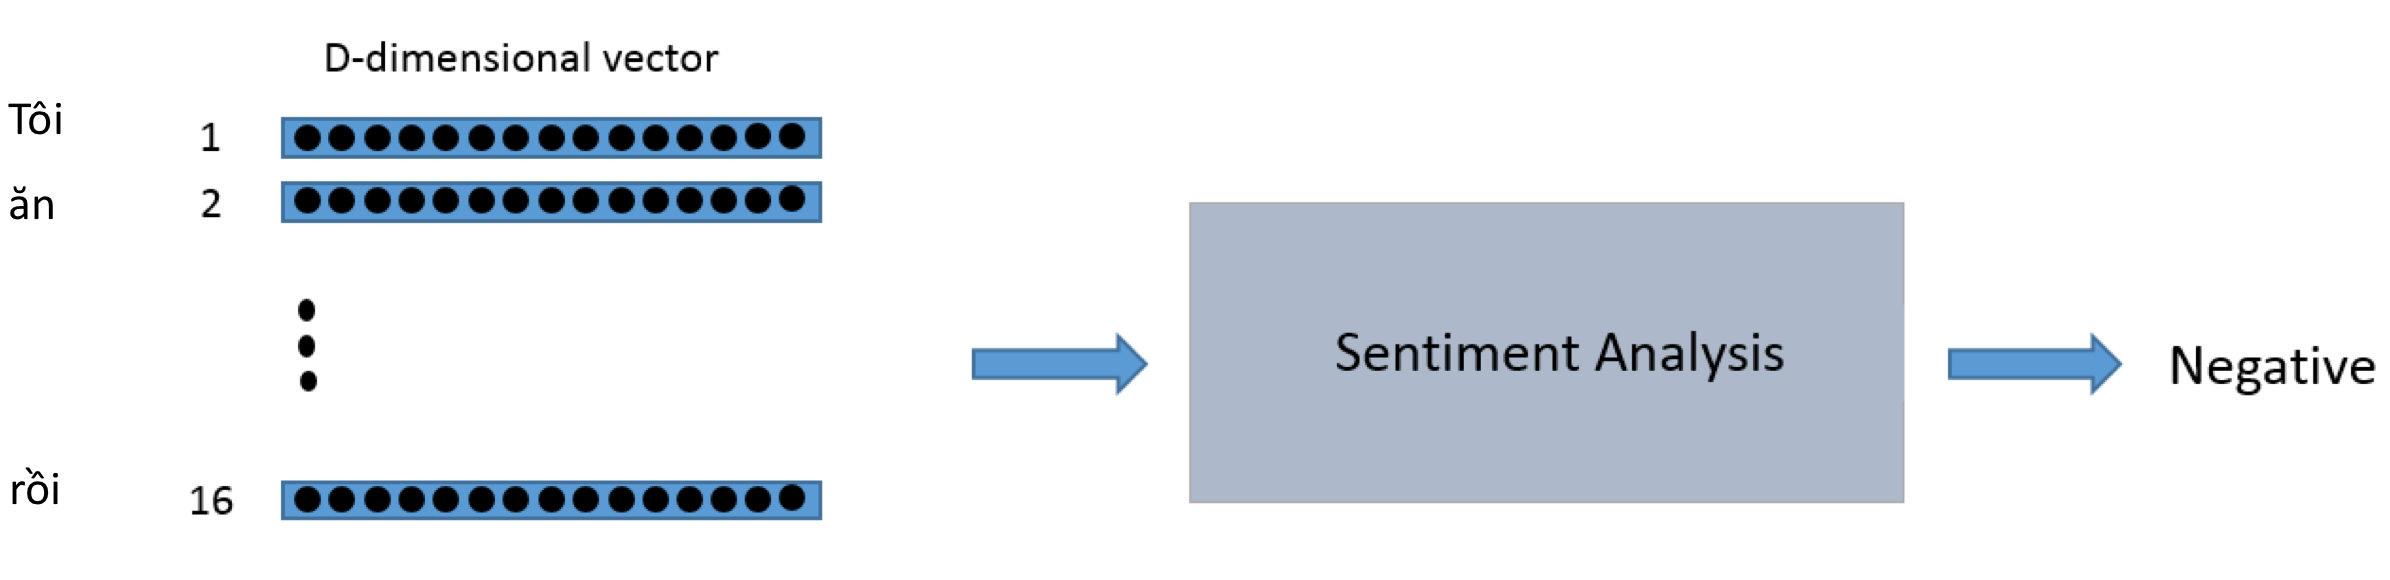

Trong h√¨nh minh ho·∫° ·ªü tr√™n, ta c√≥ th·ªÉ h√¨nh dung d·ªØ li·ªáu ƒë·∫ßu v√†o c·ªßa thu·∫≠t to√°n ph√¢n t√≠ch c·∫£m x√∫c l√† m·ªôt ma tr·∫≠n 16 x D chi·ªÅu. Trong ƒë√≥ 16 l√† s·ªë l∆∞·ª£ng t·ª´ trong c√¢u v√† D l√† s·ªë chi·ªÅu c·ªßa kh√¥ng gian vector ƒë·ªÉ bi·ªÉu di·ªÖn t·ª´. ƒê·ªÉ √°nh x·∫° t·ª´ m·ªôt t·ª´ sang m·ªôt vector, ch√∫ng ta s·ª≠ d·ª•ng ma tr·∫≠n word embedding.

## **T·∫≠p d·ªØ li·ªáu**

Trong assignment n√†y, ch√∫ng t√¥i s·ª≠ d·ª•ng t·∫≠p d·ªØ li·ªáu review tr√™n trang Foody v·ªõi kho·∫£ng 30,000 m·∫´u ƒë∆∞·ª£c g√°n nh√£n. Trong ƒë√≥ c√≥ 15,000 m·∫´u positive v√† 15,000 m·∫´u negative. Ngu·ªìn: https://streetcodevn.com/blog/dataset. T·∫≠p d·ªØ li·ªáu n√†y ƒë√£ ƒë∆∞·ª£c ƒë√≠nh k√®m trong th∆∞ m·ª•c c·ªßa assignment 3.

## **C√°c b∆∞·ªõc ƒë·ªÉ hu·∫•n luy·ªán tr√™n m·∫°ng RNN**

C√≥ 5 b∆∞·ªõc ch√≠nh ƒë·ªÉ gi·∫£i quy·∫øt b√†i to√°n ph√¢n t√≠ch c·∫£m x√∫c trong vƒÉn b·∫£n:

    1) Hu·∫•n luy·ªán m·ªôt m√¥ h√¨nh ph√°t sinh ra vector t·ª´ (nh∆∞ m√¥ h√¨nh Word2Vec) ho·∫∑c t·∫£i l√™n c√°c vector t·ª´ ti·ªÅn hu·∫•n luy·ªán.
    2) T·∫°o ma tr·∫≠n ID cho t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán
    3) T·∫°o m√¥ h√¨nh RNN v·ªõi c√°c ƒë∆°n v·ªã LSTM, s·ª≠ d·ª•ng tensorflow
    4) Hu·∫•n luy·ªán m√¥ h√¨nh RNN v·ªõi d·ªØ li·ªáu ma tr·∫≠n ƒë√£ t·∫°o ·ªü b∆∞·ªõc 2
    5) ƒê√°nh gi√° m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán v·ªõi t·∫≠p test

# **1. Load t·∫≠p t·ª´ v·ª±ng v√† ma tr·∫≠n word embedding**

ƒê·∫ßu ti√™n, ƒë·ªÉ c√≥ th·ªÉ bi·∫øn ƒë·ªïi m·ªôt t·ª´ th√†nh m·ªôt vector, ch√∫ng ta s·ª≠ d·ª•ng m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán tr∆∞·ªõc ƒë√≥ (pretrained model). M√¥ h√¨nh ƒë√£ train tr∆∞·ªõc ƒë√≥ cho ti·∫øng Vi·ªát ƒë∆∞·ª£c l·∫•y ·ªü ƒë√¢y: https://s3-us-west-1.amazonaws.com/fasttext-vectors/word-vectors-v2/cc.vi.300.vec.gz

Tuy nhi√™n, s·ªë l∆∞·ª£ng t·ª´ v·ª±ng ti·∫øng Vi·ªát ƒë∆∞·ª£c hu·∫•n luy·ªán r·∫•t l·ªõn, kho·∫£ng 2M t·ª´. M·ªói t·ª´ ƒë∆∞·ª£c bi·ªÉu di·ªÖn d∆∞·ªõi d·∫°ng m·ªôt vector 300 chi·ªÅu. V·ªõi k√≠ch th∆∞·ªõc g·ªëc c·ªßa ma tr·∫≠n word embedding nh∆∞ v·∫≠y s·∫Ω g√¢y kh√≥ khƒÉn cho vi·ªác load d·ªØ li·ªáu c≈©ng nh∆∞ ƒë∆∞a v√†o th∆∞ vi·ªán tensorflow ƒë·ªÉ hu·∫•n luy·ªán n√™n ch√∫ng t√¥i ƒë√£ t·ªëi gi·∫£n l·∫°i v·ªõi s·ªë l∆∞·ª£ng t·ª´ t·ªëi thi·ªÉu ƒë·ªÉ c√≥ th·ªÉ ch·∫°y ƒë∆∞·ª£c tr√™n t·∫≠p d·ªØ li·ªáu review v·ªÅ ƒë·ªì ƒÉn c·ªßa Foody.


In [ ]:
import numpy as np
import os
# L∆ØU √ù: C·∫¶N PH·∫¢I CH·ªàNH L·∫†I ƒê∆Ø·ªúNG D·∫™N N√ÄY TH√ÄNH TH∆Ø M·ª§C CH·ª®A C√ÅC FILE ASSIGNMENT3
# CH·ªÆ 'drive' c√≥ nghƒ©a l√† th∆∞ m·ª•c m·∫∑c ƒë·ªãnh c·ªßa Google drive
currentDir = '/content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/'

wordsList = np.load(os.path.join(currentDir, 'wordsList.npy'))
print('Simplified vocabulary loaded!')
wordsList = wordsList.tolist()
#wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load(os.path.join(currentDir, 'wordVectors.npy'))
wordVectors = np.float32(wordVectors)
print ('Word embedding matrix loaded!')

Simplified vocabulary loaded!
Word embedding matrix loaded!


ƒê·ªÉ ch·∫Øc ch·∫Øn m·ªçi d·ªØ li·ªáu ƒë∆∞·ª£c load l√™n m·ªôt c√°ch ch√≠nh x√°c, ch√∫ng ta c·∫ßn ki·ªÉm tra xem s·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn r√∫t g·ªçn v√† s·ªë chi·ªÅu c·ªßa ma tr·∫≠n word embedding c√≥ kh·ªõp v·ªõi nhau hay kh√¥ng? Trong tr∆∞·ªùng h·ª£p n√†y s·ªë t·ª´ m√† ch√∫ng t√¥i gi·ªØ l·∫°i l√† 19,899 v√† s·ªë chi·ªÅu trong kh√¥ng gian bi·ªÉu di·ªÖn l√† 300 chi·ªÅu.

In [ ]:
print('Size of the vocabulary: ', len(wordsList))
print('Size of the word embedding matrix: ', wordVectors.shape)

Size of the vocabulary:  19899
Size of the word embedding matrix:  (19899, 300)


## **Word2Vec tr√™n m·ªôt t·ª´ ƒë∆°n**

ƒê·ªÉ c√≥ th·ªÉ x√°c ƒë·ªãnh ƒë∆∞·ª£c vector bi·ªÉu di·ªÖn c·ªßa m·ªôt t·ª´ ti·∫øng Vi·ªát. ƒê·∫ßu ti√™n ch√∫ng ta s·∫Ω x√°c ƒë·ªãnh xem v·ªã tr√≠ c·ªßa t·ª´ ƒë√≥ trong wordsList. Sau ƒë√≥ l·∫•y vector ·ªü d√≤ng t∆∞∆°ng ·ª©ng tr√™n tr√™n ma tr·∫≠n wordVectors. 

In [ ]:
ngon_idx = wordsList.index('ngon')
print('Index of `ngon` in wordsList: ', ngon_idx)
ngon_vec = wordVectors[ngon_idx]
print('Vector representation of `ngon` is: ', ngon_vec)

Index of `ngon` in wordsList:  14598
Vector representation of `ngon` is:  [-2.040e-02 -9.800e-03  2.290e-01 -3.770e-02  5.430e-02 -2.680e-02
  2.190e-02 -6.290e-02 -2.200e-02 -1.010e-02  8.300e-03 -8.810e-02
 -3.630e-02  7.820e-02 -7.780e-02 -4.930e-02 -6.600e-03 -1.026e-01
 -1.040e-02  5.380e-02  4.100e-02  6.530e-02 -2.770e-02 -6.340e-02
  2.270e-02  4.420e-02  3.340e-02 -4.960e-02  8.290e-02 -3.990e-02
  3.750e-02  1.800e-02 -1.115e-01 -7.200e-02 -5.060e-02 -1.051e-01
 -4.560e-02 -1.765e-01 -3.300e-02 -6.800e-03  5.580e-02 -4.180e-02
  4.380e-02  4.940e-02  7.400e-03  4.020e-02 -8.850e-02 -9.840e-02
 -5.210e-02 -5.500e-03  3.730e-02 -8.460e-02 -6.910e-02 -4.980e-02
 -3.910e-02 -4.980e-02 -8.690e-02  6.100e-03 -5.360e-02 -3.800e-03
  1.162e-01 -4.160e-02  5.000e-03 -7.240e-02 -3.320e-02  1.800e-02
  1.200e-02 -4.420e-02  1.350e-01  6.580e-02 -1.110e-02  1.960e-02
  1.750e-02  2.010e-02  2.200e-03  1.810e-01 -6.610e-02 -6.860e-02
 -4.690e-02  7.890e-02  6.880e-02 -5.320e-02  2.770e-02

## **Word2Vec ƒë·ªÉ bi·ªÉu di·ªÖn m·ªôt ƒëo·∫°n vƒÉn b·∫£n**

N√¢ng c·∫•p h∆°n so v·ªõi phi√™n b·∫£n Word2Vec cho t·ª´ ƒë∆°n, ph·∫ßn n√†y ch√∫ng ta s·∫Ω bi·ªÉu di·ªÖn m·ªôt c√¢u d∆∞·ªõi d·∫°ng m·ªôt ma tr·∫≠n g·ªìm c√°c vector bi·ªÉu di·ªÖn c·ªßa t·ª´ng t·ª´ ch·ªìng l√™n nhau.

V√≠ d·ª• nh∆∞ ch√∫ng ta mu·ªën bi·ªÉu di·ªÖn c√¢u "M√≥n n√†y ƒÉn ho√†i kh√¥ng bi·∫øt ch√°n". ƒê·∫ßu ti√™n, v·ªõi m·ªói t·ª´ trong c√¢u ta s·∫Ω t√¨m ch·ªâ s·ªë t∆∞∆°ng ·ª©ng trong t·ª´ ƒëi·ªÉn v√† l∆∞u v√†o vector ƒë·∫∑t t√™n l√† 'sentenceIndexes'. Sau ƒë√≥, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng h√†m tra c·ª©u ma tr·∫≠n word embedding c·ªßa th∆∞ vi·ªán Tensorflow tf.nn.embedding_lookup ƒë·ªÉ tra c√°c vector t·∫°i c√°c ch·ªâ s·ªë trong 'sentenceIndexes'. Nh∆∞ v·∫≠y n·∫øu ch√∫ng ta s·ª≠ d·ª•ng t·ªëi ƒëa 10 t·ª´ ƒë·ªÉ l∆∞u tr·ªØ cho m·ªôt c√¢u th√¨ ma tr·∫≠n bi·ªÉu di·ªÖn cho c√¢u s·∫Ω l√† m·ªôt ma tr·∫≠n k√≠ch th∆∞·ªõc 10 x 300.

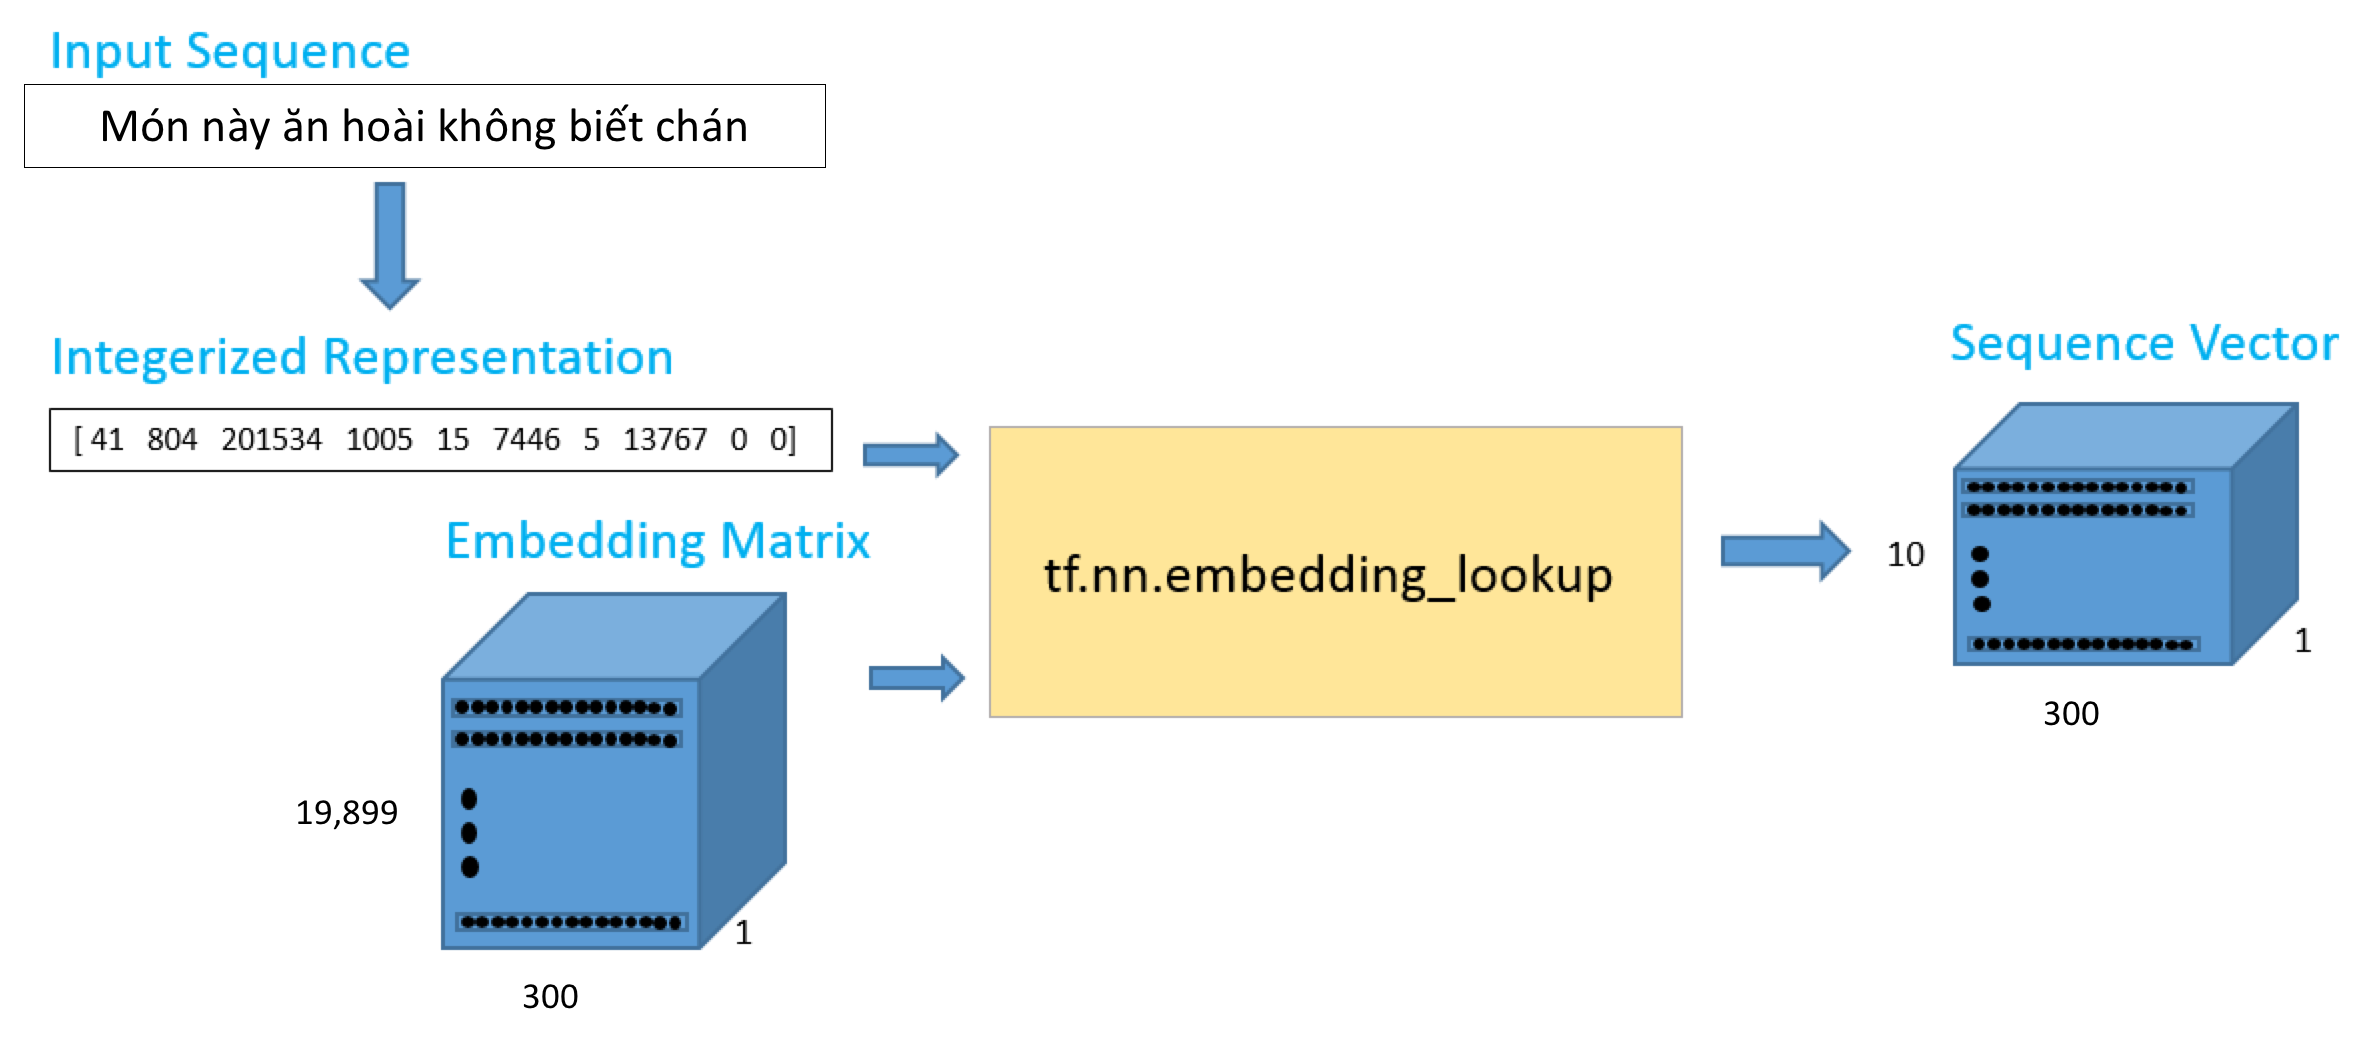

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

maxSeqLength = 10   #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
sentenceIndexes = np.zeros((maxSeqLength), dtype='int32')

# TODO 3.1: G√°n ch·ªâ s·ªë c·ªßa c√°c t·ª´ trong c√¢u v√† 'sentenceIndexes'

m√≥n_idx = wordsList.index('m√≥n')
print('Index of `m√≥n` in wordsList: ', m√≥n_idx)

n√†y_idx = wordsList.index('n√†y')
print('Index of `n√†y` in wordsList: ', n√†y_idx)

ƒÉn_idx = wordsList.index('ƒÉn')
print('Index of `ƒÉn` in wordsList: ', ƒÉn_idx)

ho√†i_idx = wordsList.index('ho√†i')
print('Index of `ho√†i` in wordsList: ', ho√†i_idx)

kh√¥ng_idx = wordsList.index('kh√¥ng')
print('Index of `kh√¥ng` in wordsList: ', kh√¥ng_idx)

bi·∫øt_idx = wordsList.index('bi·∫øt')
print('Index of `bi·∫øt` in wordsList: ', bi·∫øt_idx)

ch√°n_idx = wordsList.index('ch√°n')
print('Index of `ch√°n` in wordsList: ', ch√°n_idx)

sentenceIndexes[0] = wordsList.index('m√≥n')
sentenceIndexes[1] = wordsList.index('n√†y')
sentenceIndexes[2] = wordsList.index('ƒÉn')
sentenceIndexes[3] = wordsList.index('ho√†i')
sentenceIndexes[4] = wordsList.index('kh√¥ng')
sentenceIndexes[5] = wordsList.index('bi·∫øt')
sentenceIndexes[6] = wordsList.index('ch√°n')

# C√°c ch·ªâ s·ªë 7, 8, 9 c·ªßa sentenceIndexes  v·∫´n ƒë∆∞·ª£c g√°n b·∫±ng 0 nh∆∞ c≈©
print(sentenceIndexes.shape)
print('Row index for each word: ', sentenceIndexes)

# Ma tr·∫≠n bi·ªÉu di·ªÖn:
print('Sentence representation of word vectors:')
with tf.compat.v1.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,sentenceIndexes).eval().shape)

Instructions for updating:
non-resource variables are not supported in the long term
Index of `m√≥n` in wordsList:  119
Index of `n√†y` in wordsList:  8136
Index of `ƒÉn` in wordsList:  4884
Index of `ho√†i` in wordsList:  18791
Index of `kh√¥ng` in wordsList:  16614
Index of `bi·∫øt` in wordsList:  15951
Index of `ch√°n` in wordsList:  3371
(10,)
Row index for each word:  [  119  8136  4884 18791 16614 15951  3371     0     0     0]
Sentence representation of word vectors:
(10, 300)


N·∫øu nh∆∞ th·ª±c hi·ªán ƒë√∫ng th√¨ vector 'sentenceIndexes' s·∫Ω c√≥ gi√° tr·ªã l√†: [119, 8136, 4884, 18791, 16614, 15951, 3371, 0, 0, 0]

# **2. Kh·∫£o s√°t t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán v√† t·∫°o ma tr·∫≠n ID**

Trong assignment, ch√∫ng t√¥i s·ª≠ d·ª•ng t·∫≠p d·ªØ li·ªáu l·∫•y t·ª´ trang web Foody tr√™n mi·ªÅn d·ªØ li·ªáu li√™n quan ƒë·∫øn ·∫©m th·ª±c. T·∫≠p d·ªØ li·ªáu bao g√¥m 15.000 review t√≠ch c·ª±c ƒë·∫∑t trong th∆∞ m·ª•c 'positiveReviews' v√† 15.000 review ti√™u c·ª±c ƒë·∫∑t trong th∆∞ m·ª•c 'negativeReviews'. Do kh·ªëi l∆∞·ª£ng d·ªØ li·ªáu l·ªõn, n·∫øu ch√∫ng ta ch·ªçn s·ªë l∆∞·ª£ng t·ª´ t·ªëi ƒëa (maxSeqLength) qu√° cao th√¨ s·∫Ω b·ªã l√£ng ph√≠ khi bi·ªÉu di·ªÖn ·ªü nh·ªØng c√¢u review qu√° ng·∫Øn. Ng∆∞·ª£c l·∫°i, n·∫øu s·ª≠ d·ª•ng s·ªë l∆∞·ª£ng t·ª´ t·ªëi ƒëa qu√° √≠t th√¨ s·∫Ω b·ªã b·ªè l·ª° nh·ªØng t·ª´ quan tr·ªçng gi√∫p cho vi·ªác ph√¢n t√≠ch c·∫£m x√∫c.

In [ ]:
from os import listdir
from os.path import isfile, join

path_1 = "/content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/positiveReviews/" 
positiveFiles = [os.path.join(path_1, f)
                       for f in os.listdir(path_1)
                       if f.endswith('.txt')]

path_2 = "/content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/negativeReviews/" 
negativeFiles = [os.path.join(path_2, f)
                       for f in os.listdir(path_2)
                       if f.endswith('.txt')]
numWords = []

for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 30009
The total number of words in the files is 1771186
The average number of words in the files is 59.02182678529774


Ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng th∆∞ vi·ªán Matplot ƒë·ªÉ minh ho·∫° ph√¢n b·ªë v·ªÅ chi·ªÅu d√†i c·ªßa c√°c c√¢u review trong t·∫≠p d·ªØ li·ªáu:

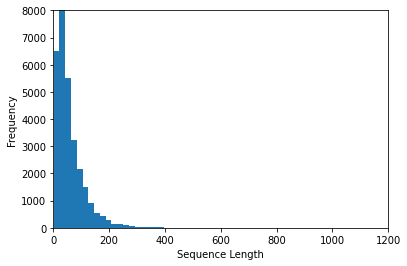

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

D·ª±a tr√™n bi·ªÉu ƒë·ªì histogram ·ªü tr√™n ch√∫ng ta c√≥ th·ªÉ th·∫•y l√† 180 l√† k·∫øt qu·∫£ t∆∞∆°ng ƒë·ªëi h·ª£p l√Ω. 

In [ ]:
maxSeqLength = 180

ƒê·ªÉ c√≥ c·∫£m nh·∫≠n r√µ h∆°n v·ªÅ d·ªØ li·ªáu, ch√∫ng ta c√≥ th·ªÉ hi·ªÉn th·ªã m·ªôt s·ªë review b·∫•t k·ª≥ nh∆∞ sau.

In [ ]:
print('A positive sentence: ')
fname = positiveFiles[3] # Randomly select a positive file to view
with open(fname, encoding='utf-8') as f:
    for lines in f:
        print(lines)

print('A negative sentence: ')
fname = negativeFiles[5] # Randomly select a negative file to view
with open(fname, encoding='utf-8') as f:
    for lines in f:
        print(lines)

A positive sentence: 
Qu√°n n√†y kh√° l√† ·∫•m_c√∫ng ! Kh√¥ng_gian r·ªông b√†y tr√≠ kh√° ƒë·∫πp ! üëå üëå üëå Nh√¢n_vi√™n ·ªü ƒë√¢y r·∫•t vui_t√≠nh , ho·∫°t_b√°t , nƒÉng_ƒë·ªông ! ! ! üòå üòå üòå M√≥n ƒÉn_·ªü ƒë√¢y kh√° l√† ngon nh·∫•t_l√† b√≤ b√≠a ! ‚ô® Ô∏è ‚ô® Ô∏è ‚ô® Ô∏è m√≥n b√≤ b√≠a c√≥ n∆∞·ªõc s·ªët r·∫•t ƒë·∫∑c_bi·ªát , ƒÉn v√†o c√≥ v·ªã ng·ªçt ng·ªçt , chua_chua , cay_cay r·∫•t l√† ngon üëç üëç üëç C√≤n n·ªØa m√≥n ·ªëc_nh·ªìi t√¢y h·ªì ·ªü ƒë√¢y kh√° l√† ngon ! M√≥n n√†y m·ªõi d·ªçn ra l√† m√πi th∆°m n·ªìng c·ªßa ·ªëc khi·∫øn m√¨nh kh√¥ng_th·ªÉ c∆∞·ª°ng l·∫°i s·ª± h·∫•p_d·∫´n c·ªßa m√≥n ƒÉn n√†y ! üç¥ üç¥ üç¥ M√≥n n√†y ƒÉn v√†o r·∫•t l√† ngon nha dai dai nhai r·∫•t th√≠ch ! V·ªÅ m√≥n tr√°ng_mi·ªáng th√¨ m√¨nh th∆∞·ªùng ƒÉn th√™m m·ªôt ph·∫ßn Flan n∆∞·ªõc_c·ªët d·ª´a v·ªã th·ª©c_ƒÉn n√†y r·∫•t ngon , m·ªôt s·ª± k·∫øt_h·ª£p gi·ªØa n∆∞·ªõc_c·ªët d·ª´a ng·ªçt_ng√†o v√† v·ªã b√°nh flan beo_b√©o t·∫°o n√™n m·ªôt m√≥n ƒÉn th·ª±c_s·ª± tuy·ªát_v·ªùi ‚ù§ Ô∏è ‚ù§ Ô∏è ‚ù§ Ô∏è



## **Chu·∫©n ho√° vƒÉn b·∫£n v√† t√°ch t·ª´**

ƒê·ªÉ ti·∫øt ki·ªám c√¥ng s·ª©c v√† c≈©ng n·∫±m ngo√†i ph·∫°m vi c·ªßa kho√° h·ªçc, ch√∫ng t√¥i ƒë√£ chu·∫©n b·ªã s·∫µn t·∫≠p d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c t√°ch t·ª´. Gi·ªØa hai t·ª´ c√≥ th·ªÉ gh√©p l·∫°i ƒë·ªÉ t·∫°o th√†nh m·ªôt kh√°i ni·ªám m·ªõi ch√∫ng t√¥i s·ª≠ d·ª•ng k√Ω t·ª± '_' ƒë·ªÉ n·ªëi c√°c t·ª´ ƒë√≥. V√≠ d·ª•: 'sinh_vi√™n', 'sinh_h·ªçc'.

Ch√∫ng t√¥i chu·∫©n b·ªã s·∫µn c√°c h√†m chu·∫©n ho√° vƒÉn b·∫£n nh·∫±m lo·∫°i b·ªè c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát. Tham kh·∫£o ·ªü h√†m 'cleanSentences'.

In [ ]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^\w0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

B√¢y gi·ªù ch√∫ng ta s·∫Ω bi·ªÉu di·ªÖn 30.000 review d∆∞·ªõi d·∫°ng c√°c ch·ªâ s·ªë c·ªßa c√°c t·ª´. T·∫≠p d·ªØ li·ªáu positive v√† negative s·∫Ω ƒë∆∞·ª£c t√≠nh h·ª£p l·∫°i th√†nh m·ªôt ma tr·∫≠n 30000x180. Trong ƒë√≥ 30000 l√† s·ªë l∆∞·ª£ng review v√† 180 l√† s·ªë l∆∞·ª£ng t·ª´ t·ªëi ƒëa cho m·ªôt c√¢u. Do b∆∞·ªõc chu·∫©n b·ªã n√†y t·ªën kh√° nhi·ªÅu t√†i nguy√™n t√≠nh to√°n n√™n sau khi t√≠nh to√°n xong, ch√∫ng ta s·∫Ω l∆∞u l·∫°i ƒë·ªÉ s·ª≠ d·ª•ng cho nh·ªØng l·∫ßn ch·∫°y th√≠ nghi·ªám sau. Ma tr·∫≠n l∆∞u tr·ªØ c√°c ch·ªâ s·ªë n√†y l√†: 'ids'.

### **x√°c ƒë·ªãnh ch·ªâ s·ªë c·ªßa t·ª´ng t·ª´ trong review**

Trong ph·∫ßn n√†y ch√∫ng ta s·∫Ω ti·∫øn h√†nh tra c·ª©u t·ª´ng t·ª´ trong review, sau ƒë√≥ g√°n v√†o ma tr·∫≠n 'ids'. Trong ƒë√≥ ch·ªâ s·ªë d√≤ng c·ªßa ma tr·∫≠n t∆∞∆°ng ·ª©ng v·ªõi file review, ch·ªâ s·ªë c·ªôt c·ªßa ma tr·∫≠n t∆∞∆°ng ·ª©ng v·ªõi m·ªôt t·ª´ c·ªßa review. Tr∆∞·ªùng h·ª£p t·ª´ n√†o kh√¥ng c√≥ trong t·∫≠p t·ª´ ƒëi·ªÉn th√¨ ta s·∫Ω g√°n b·∫±ng ch·ªâ s·ªë c·ªßa t·ª´ 'UNK' (unknow).

N·∫øu ch∆∞a t√≠nh to√°n cho ma tr·∫≠n 'ids' h√£y l√†m b∆∞·ªõc sau:

In [ ]:
'''ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
nFiles = 0

for pf in positiveFiles:
    with open(pf, "r", encoding="utf-8") as f:
        nIndexes = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            # TODO 3.2: N·∫øu 'word' thu·ªôc t·∫≠p 'wordsList' th√¨ g√°n ch·ªâ s·ªë c·ªßa 'word' v√†o ma tr·∫≠n ids
            try:
                ids[nFiles][nIndexes] = wordsList.index(word)
            # Ng∆∞·ª£c l·∫°i: g√°n gi√° tr·ªã unknown v√†o ma tr·∫≠n ids
            execept ValueError:
                ids[nFiles][nIndexes] = 399999 #Vector for unknown
            
            nIndexes = nIndexes + 1
            if nIndexes >= maxSeqLength:
                break
        nFiles = nFiles + 1 

print('Positive files are indexed!')
for nf in negativeFiles:
    with open(nf, "r", encoding="utf-8") as f:
        nIndexes = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            # ToDo 3.2: t∆∞∆°ng t·ª± nh∆∞ tr√™n. Kh√¥ng kh√°c g√¨ h·∫øt.
             try:
                ids[nFiles][nIndexes] = wordsList.index(word)
            # Ng∆∞·ª£c l·∫°i: g√°n gi√° tr·ªã unknown v√†o ma tr·∫≠n ids
            execept ValueError:
                ids[nFiles][nIndexes] = 399999 #Vector for unknown
            
            nIndexes = nIndexes + 1
            if nIndexes >= maxSeqLength:
                break
        nFiles = nFiles + 1 

print('Negative files are indexed!')
# Save ids Matrix for future uses.
np.save(os.path.join(currentDir,'idsMatrix.npy'), ids)
print(ids[0])'''

'ids = np.zeros((numFiles, maxSeqLength), dtype=\'int32\')\nnFiles = 0\n\nfor pf in positiveFiles:\n    with open(pf, "r", encoding="utf-8") as f:\n        nIndexes = 0\n        line=f.readline()\n        cleanedLine = cleanSentences(line)\n        split = cleanedLine.split()\n        for word in split:\n            # TODO 3.2: N·∫øu \'word\' thu·ªôc t·∫≠p \'wordsList\' th√¨ g√°n ch·ªâ s·ªë c·ªßa \'word\' v√†o ma tr·∫≠n ids\n            try:\n                ids[nFiles][nIndexes] = wordsList.index(word)\n            # Ng∆∞·ª£c l·∫°i: g√°n gi√° tr·ªã unknown v√†o ma tr·∫≠n ids\n            execept ValueError:\n                ids[nFiles][nIndexes] = 399999 #Vector for unknown\n            \n            nIndexes = nIndexes + 1\n            if nIndexes >= maxSeqLength:\n                break\n        nFiles = nFiles + 1 \n\nprint(\'Positive files are indexed!\')\nfor nf in negativeFiles:\n    with open(nf, "r", encoding="utf-8") as f:\n        nIndexes = 0\n        line=f.readline()\n    

L∆ØU √ù: B∆∞·ªõc th·ª±c hi·ªán tr√™n t∆∞∆°ng ƒë·ªëi m·∫•t th·ªùi gian.

Tr∆∞·ªùng h·ª£p ƒë√£ t√≠nh to√°n v√† l∆∞u ma tr·∫≠n 'ids' r·ªìi th√¨ ta c√≥ th·ªÉ load l√™n ƒë·ªÉ s·ª≠ d·ª•ng lu√¥n

In [ ]:
ids = np.load(os.path.join(currentDir,'idsMatrix.npy'))
print('Word indexes of the first review: ', ids[0])

Word indexes of the first review:  [19898  1906  4454  5284 10661 11694 11994 18784 18569 18619 13174  9821
 14794  8884  6443  5767  8589 18850 15570  5596   799 11060  4222 16893
 13078  8136  3364  4454  4756 10304  8885  3553  9782  1232 14359 10606
   579 15522  2219 15092 14855 15253  4884  3364  5519  4558  9649   269
 15522 12309 14855 11503  2212  4884  7155 11577  4222  5767 15076 12225
 10774  1218  2876 19584  4558  2974 13452  5013   842 10642 17292 11895
   803 11060 16760  1906 15253 14598 15253  1047  5668  4884 10642 12225
  7090 17292 18109 13078 16334  1238  3364  5519  4135  3553 14967  4964
 15385  9673  2997 14855  7446  8038 11440  1345   842  5767   803 11060
 18791  5013     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0    

N·∫øu nh∆∞ qu√° tr√¨nh chuy·ªÉn t·ª´ c√¢u d·∫°ng vƒÉn b·∫£ng sang vector c√°c ch·ªâ s·ªë trong t·ª´ ƒëi·ªÉn ·ªü tr√™n ƒë√∫ng th√¨ ids[0] s·∫Ω nh·∫≠n gi√° tr·ªã: [19898  1906  4454  5284 10661 11694 11994 18784 18569 18619 13174  9821 ...]

## **X√¢y d·ª±ng h√†m l·∫•y d·ªØ li·ªáu train v√† test theo t·ª´ng batch**

D∆∞·ªõi ƒë√¢y ch√∫ng t√¥i x√¢y d·ª±ng c√°c h√†m ƒë·ªÉ l·∫•y d·ªØ li·ªáu train v√† test theo t·ª´ng batch. B·∫°n h√£y gi·∫£i th√≠ch t·∫°i sao l·∫°i c√≥ c√°c con s·ªë 13999, 14999, 15999, 29999 nh√©.

In [ ]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            # Pick positive samples randomly
            num = randint(1,13999)
            labels.append([1,0])
        else:
            # Pick negative samples randomly
            num = randint(15999,29999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(13999,15999)
        if (num <= 14999):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

# **3. X√¢y d·ª±ng RNN Model v·ªõi Tensorflow**

ƒê·∫ßu ti√™n ch√∫ng t√¥i s·∫Ω kh·ªüi t·∫°o c√°c tham s·ªë cho m√¥ h√¨nh m·∫°ng RNN v·ªõi c√°c cell l√† c√°c LSTM. Ki·∫øn tr√∫c m·∫°ng ·ªü ƒë√¢y bao g·ªìm 128 ƒë∆°n v·ªã cho m·ªói l·ªõp, s·ªë l∆∞·ª£ng layer l√† 2, s·ªë l∆∞·ª£ng ph√¢n l·ªõp l√† 2 v√† s·ªë v√≤ng l·∫∑p khi hu·∫•n luy·ªán l√† 30000.

In [ ]:
# Initialize paramters
numDimensions = 300
batchSize = 64
lstmUnits = 128
nLayers = 2
numClasses = 2
iterations = 30000

ƒê·ªÉ l∆∞u tr·ªØ d·ªØ li·ªáu input v√† ouput, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng hai ki·ªÉu d·ªØ li·ªáu placeholder. M·ªôt trong nh·ªØng ƒëi·ªÅu quan tr·ªçng nh·∫•t khi kh·ªüi t·∫°o c√°c bi·∫øn input v√† output n√†y l√† x√°c ƒë·ªãnh k√≠ch th∆∞·ªõc c·ªßa c√°c tensor. M·ªói output c·ªßa m·∫°ng (hay c√≤n g·ªçi l√† label) s·∫Ω l√† m·ªôt vector one hot v·ªõi hai gi√° tr·ªã t∆∞∆°ng ·ª©ng v·ªõi hai lo·∫°i c·∫£m x√∫c: [1, 0] cho positive v√† [0, 1] cho negative.

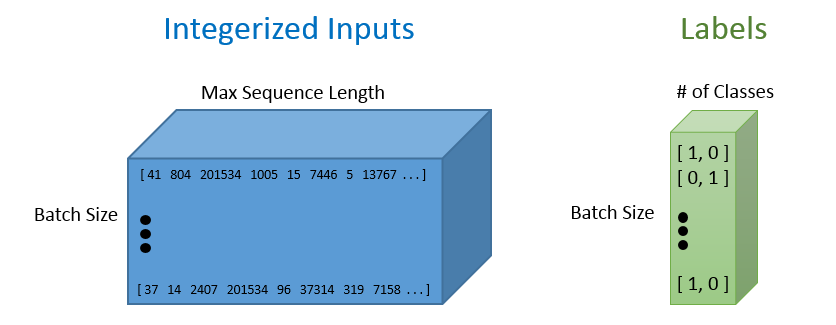

## **X√°c ƒë·ªãnh input v√† output**

Kh·ªüi t·∫°o hai bi·∫øn 'inputs' v√† 'labels' b·∫±ng ki·ªÉu placeholder.

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.framework import ops
ops.reset_default_graph()

# TODO 3.3: Kh·ªüi t·∫°o hai bi·∫øn 'inputs' v√† 'labels'
labels = tf.placeholder(tf.float32, [batchSize, numClasses])
inputs = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

print(labels.shape)
print(inputs.shape)

(64, 2)
(64, 180)


Sau ƒë√≥ t·∫°o d·ªØ li·ªáu word vector t·ª´ kh·ªëi d·ªØ li·ªáu ƒë·∫ßu v√†o v·ªõi ma tr·∫≠n word embedding. N·∫øu nh∆∞ qu√° tr√¨nh kh·ªüi t·∫°o ƒë√∫ng th√¨ s·∫Ω t·∫°o ra c√°c ki·ªÉu d·ªØ li·ªáu sau:
labels --> Tensor("Placeholder:0", shape=(64, 2), dtype=float32)
inputs --> Tensor("Placeholder_1:0", shape=(64, 180), dtype=int32)

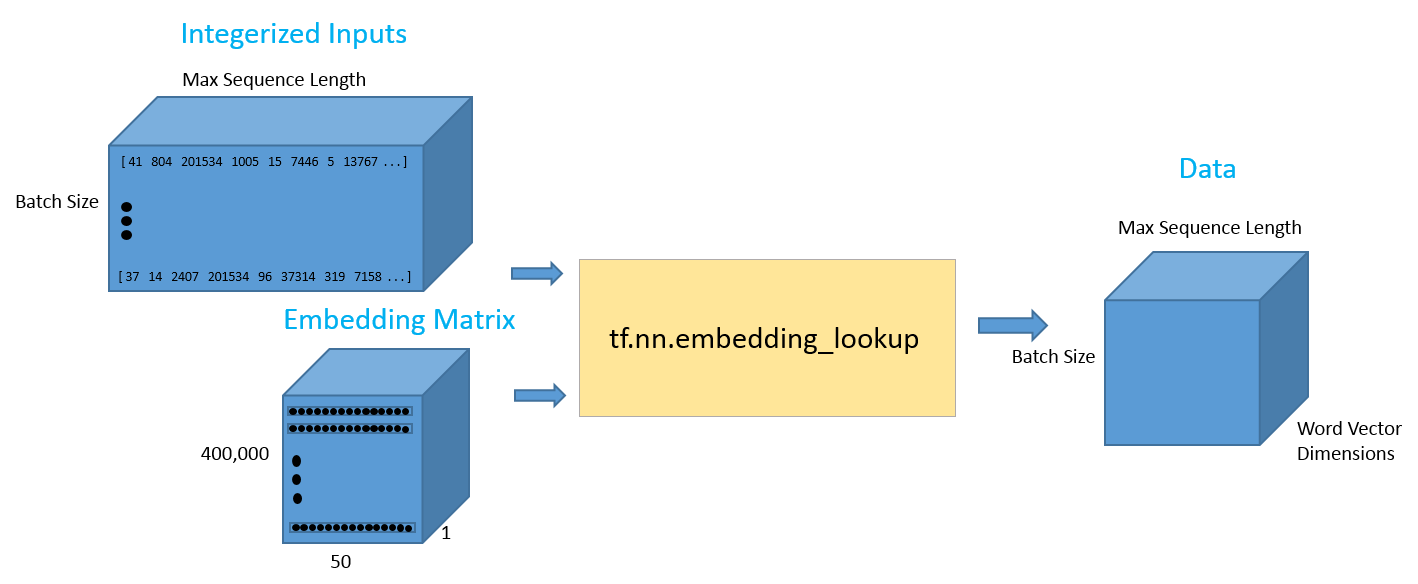

In [ ]:
data = tf.nn.embedding_lookup(wordVectors, inputs)

Nh∆∞ v·∫≠y sau b∆∞·ªõc n√†y ch√∫ng ta ƒë√£ c√≥ d·ªØ li·ªáu ƒë·ªÉ ƒë∆∞a v√†o m·∫°ng m·∫°ng c√°c LSTM. ƒê·ªÉ kh·ªüi t·∫°o m·ªôt LSTM ch√∫ng ta s·ª≠ d·ª•ng h√†m tf.nn.rnn_cell.BasicLSTMCell. H√†m n√†y c·∫ßn tham s·ªë ƒë·∫ßu v√†o l√† s·ªë l∆∞·ª£ng ƒë∆°n v·ªã mu·ªën kh·ªüi t·∫°o. ƒê√¢y ch√≠nh l√† m·ªôt hyperparamter ƒë√£ ƒë∆∞·ª£c kh·ªüi t·∫°o tr∆∞·ªõc ƒë√≥.
ƒê·ªÉ ch·ªëng l·∫°i vi·ªác overfitting, ch√∫ng ta s·ª≠ d·ª•ng l·ªõp dropout. 

ƒê·ªÉ tƒÉng t√≠nh ph·ª©c t·∫°p cho ki·∫øn tr√∫c m·∫°ng ch√∫ng ta ch·ªìng c√°c l·ªõp LSTM l√™n nhau (Stack LSTM Layers). Trong tr∆∞·ªùng h·ª£p n√†y ch√∫ng ta s·ª≠ d·ª•ng 2 l·ªõp LSTM. Vi·ªác ch·ªìng th√™m c√°c l·ªõp LSTM s·∫Ω gi√∫p cho m√¥ h√¨nh c√≥ kh·∫£ nƒÉng nh·ªõ nhi·ªÅu th√¥ng tin h∆°n nh∆∞ng ƒë·ªìng th·ªùi c≈©ng l√†m tƒÉng s·ªë l∆∞·ª£ng tham s·ªë khi hu·∫•n luy·ªán. ƒêi·ªÅu n√†y c≈©ng c√≥ nghƒ©a l√† s·∫Ω l√†m tƒÉng th·ªùi gian hu·∫•n luy·ªán c≈©ng nh∆∞ l√† c·∫ßn th√™m nhi·ªÅu d·ªØ li·ªáu h∆°n.

Cu·ªëi c√πng l√† ƒë∆∞a to√†n b·ªô d·ªØ li·ªáu ƒë·∫ßu v√†o v√†o m·∫°ng c√°c LSTM s·ª≠ d·ª•ng h√†m tf.nn.dynamic_rnn. Chi ti·∫øt ki·∫øn tr√∫c m·∫°ng LSTM s·ª≠ d·ª•ng cho b√†i t·∫≠p n√†y ƒë∆∞·ª£c m√¥ t·∫£ trong h√¨nh sau:

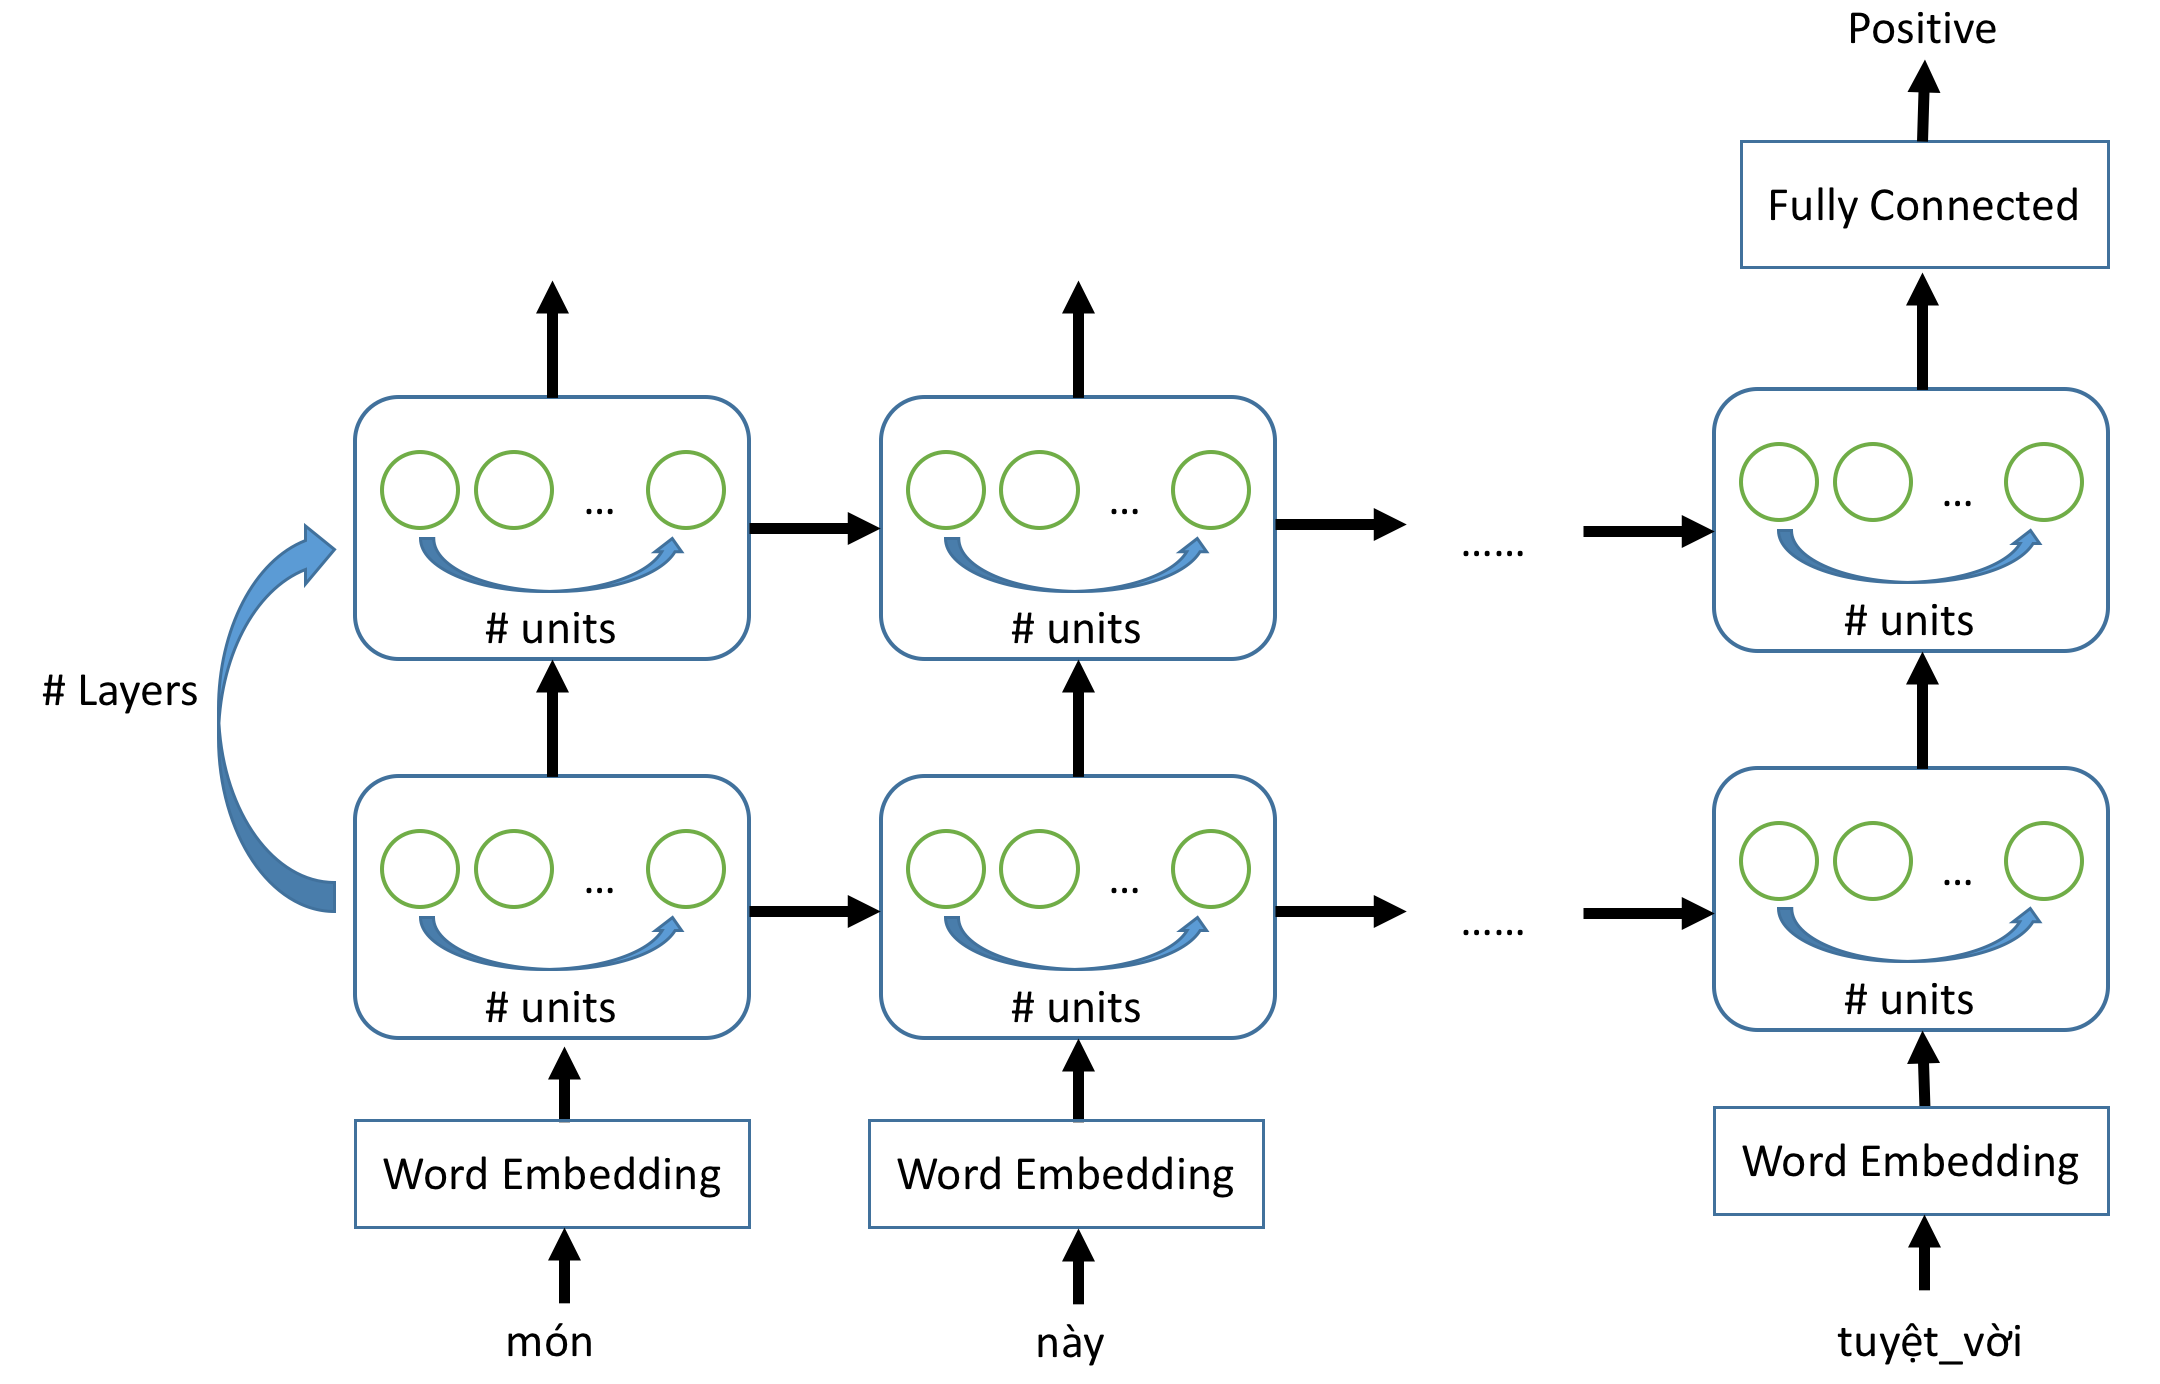

In [ ]:
def generate_a_lstm_layer():
    # Kh·ªüi t·∫°o m·ªôt LSTM Layer v·ªõi "lstmUnits"
    cell = tf.nn.rnn_cell.LSTMCell(lstmUnits)
    
    # Sau ƒë√≥ t·∫°o m·ªôt l·ªõp dropout ƒë·ªÉ ch·ªëng overfitting
    dropout = tf.nn.rnn_cell.DropoutWrapper(cell, output_keep_prob=0.75)
    return dropout

# Sau khi ƒë√£ c√≥ h√†m t·∫°o m·ªôt LSTM Layer, ta s·ª≠ d·ª•ng h√†m n√†y ƒë·ªÉ ch·ªìng c√°c LSTM l√™n
stack = tf.keras.layers.StackedRNNCells([generate_a_lstm_layer() for n in range(nLayers)])
# Feed data variable v√†o m·∫°ng LSTM
outputs, state = tf.nn.dynamic_rnn(cell=stack, inputs=data, dtype=tf.float32)
outputs

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:909: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


<tf.Tensor 'rnn/transpose_1:0' shape=(64, 180, 128) dtype=float32>

Sau khi ra kh·ªèi m·∫°ng LSTM, bi·∫øn outputs s·∫Ω l√† m·ªôt tensor c√≥ k√≠ch th∆∞·ªõc [batchSize x maxSeqLength x lstmUnits], c·ª• th·ªÉ l√† [64 x 180 x 128].

Sau ƒë√≥, ch√∫ng ta ch·ªâ l·∫•y d·ªØ li·ªáu ·ªü LSTM cell cu·ªëi c√πng v√† cho ƒëi qua l·ªõp k·∫øt n·ªëi ƒë·∫ßy ƒë·ªß ƒë·ªÉ ph√¢n lo·∫°i th√†nh 2 tr·∫°ng th√°i. Ch·ªâ s·ªë c·ªßa LSTM cell cu·ªëi c√πng l√† 179 (do c√≥ 180 cell theo chi·ªÅu ngang)  n√™n ƒë·ªÉ c√≥ th·ªÉ l·∫•y ƒë∆∞·ª£c gi√° tr·ªã ta s·∫Ω chuy·ªÉn v·ªã v·ªÅ tensor c√≥ k√≠ch th∆∞·ªõc [maxSeqLength x batchSize x lstmUnits] hay [180 x 64 x 128]. S·ª≠ d·ª•ng h√†m tf.gather ƒë·ªÉ l·∫•y tensor th·ª© 179 c√≥ k√≠ch th∆∞·ªõc [64 x 128] bao g·ªìm 64 m·∫´u vector 128 chi·ªÅu. Vector 128 chi·ªÅu n√†y s·∫Ω ƒë∆∞·ª£c ƒë∆∞a v√†o l·ªõp fully connected ƒë·ªÉ chuy·ªÉn ƒë·ªïi v·ªÅ vector 2 chi·ªÅu t∆∞∆°ng ·ª©ng v·ªõi 2 tr·∫°ng th√°i.

L·ªõp k·∫øt n·ªëi ƒë·∫ßy ƒë·ªß bao g·ªìm c√°c b·ªô tham s·ªë 'weight' v√† 'bias' ƒë·ªÉ th·ª±c hi·ªán vi·ªác d·ª± ƒëo√°n k·∫øt qu·∫£. B∆∞·ªõc n√†y ch√≠nh l√† t·∫°o m·ªôt l·ªõp Fully Connected nh∆∞ trong s∆° ƒë·ªì ki·∫øn tr√∫c m·∫°ng LSTM.

In [ ]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))

# L·∫•y gi√° tr·ªã output t·∫°i LSTM cell cu·ªëi c√πng
outputs = tf.transpose(outputs, [1, 0, 2])
last = tf.gather(outputs, int(outputs.get_shape()[0]) - 179)
# ƒê∆∞a qua m·∫°ng Fully Connected m√† kh√¥ng c√≥ activation function
prediction = (tf.matmul(last, weight) + bias)

ƒê·ªÉ x√°c ƒë·ªãnh ƒë·ªô ch√≠nh x√°c c·ªßa h·ªá th·ªëng, ta ƒë·∫øm s·ªë l∆∞·ª£ng labels kh·ªõp v·ªõi gi√° tr·ªã d·ª± ƒëo√°n (prediction). Sau ƒë√≥ t√≠nh ƒë·ªô ch√≠nh x√°c b·∫±ng c√°ch t√≠nh gi√° tr·ªã trung b√¨nh c·ªßa c√°c k·∫øt qu·∫£ tr·∫£ v·ªÅ ƒë√∫ng.

In [ ]:
correctResult = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctResult, tf.float32))

Sau ƒë√≥ ch√∫ng ta s·∫Ω x√°c ƒë·ªãnh h√†m ƒë·ªô l·ªói s·ª≠ d·ª•ng softmax cross entropy ƒë∆∞·ª£c t√≠nh t·ª´ d·ªØ li·ªáu d·ª± ƒëo√°n v√† t·∫≠p labels. Cu·ªëi c√πng l√† ch·ªçn thu·∫≠t to√°n t·ªëi ∆∞u v·ªõi tham s·ªë learning rate m·∫∑c ƒë·ªãnh l√† 0.001. 

In [ ]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

## **S·ª≠ d·ª•ng Tensorboard ƒë·ªÉ visualize k·∫øt qu·∫£**

Trong qu√° tr√¨nh hu·∫•n luy·ªán, ch∆∞∆°ng tr√¨nh s·∫Ω ghi log v·ªÅ ƒë·ªô l·ªói v√† ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p train v√†o th∆∞ m·ª•c 'tensorboard', l∆∞u l·∫°i model sau m·ªói 2000 v√≤ng l·∫∑p ·ªü th∆∞ m·ª•c 'models'. Vi·ªác hu·∫•n luy·ªán tr√™n 30,000 v√≤ng l·∫∑p m·∫•t kho·∫£ng v√†i ti·∫øng v·ªõi GPU K80 ƒë∆∞·ª£c cung c·∫•p b·ªüi Google Colab.

# **4. Hu·∫•n luy·ªán**

V·ªõi m·ªói v√≤ng l·∫∑p, ta s·∫Ω l·∫•y ra m·ªôt batch d·ªØ li·ªáu train ƒë·ªÉ ƒë∆∞a v√†o m·∫°ng s·ª≠ d·ª•ng `feed_dict`. v·ªõi c√°c tham s·ªë input v√† label l√† c√°c placeholders. B∆∞·ªõc hu·∫•n luy·ªán n√†y ƒë∆∞·ª£c l·∫∑p l·∫°i cho ƒë·∫øn khi h·∫øt s·ªë l·∫ßn c·∫ßn hu·∫•n luy·ªán.

In [ ]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"

In [ ]:
writer = tf.summary.FileWriter(logdir, sess.graph)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=1)
config = tf.ConfigProto(allow_soft_placement=True, gpu_options=gpu_options)
with tf.Session(config=config) as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    
    for i in range(iterations):
        # TODO 3.5
        # Get next training batch
        nextBatch, nextBatchLabels = getTrainBatch();

        # Feed to optimizer
        sess.run(optimizer, {inputs: nextBatch, labels: nextBatchLabels})

        #Write summary to Tensorboard
        if (i % 50 == 0):
            summary = sess.run(merged, {inputs: nextBatch, labels: nextBatchLabels})
            writer.add_summary(summary, i)

        # Save model every 2000 training iterations
        if (i % 2000 == 0 and i != 0):
            save_path = saver.save(sess, os.path.join(currentDir,"models/pretrained_lstm.ckpt"), global_step=i)
            print("saved to %s" % save_path)
    writer.close()

saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-2000
saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-4000
saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-6000
saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-8000
saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-10000
Instructions for updating:
Use standard file APIs to delete files with this prefix.
saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-12000
saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-14000
saved to /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢

# **5. Load m√¥ h√¨nh ƒë√£ train v√† ƒë√°nh gi√° m√¥ h√¨nh**

Th·ªùi gian hu·∫•n luy·ªán m·∫°ng kh√° l√¢u, n√™n trong qu√° tr√¨nh m·∫°ng ƒëang ƒë∆∞·ª£c hu·∫•n luy·ªán, ta s·∫Ω l∆∞u l·∫°i m·ªôt s·ªë checkpoint. ƒê·ªÉ c√≥ th·ªÉ test th·ª≠ tr√™n m·ªôt checkpoint m·ªõi nh·∫•t ta s·ª≠ d·ª•ng h√†m tf.train.latest_checkpoint v√† truy·ªÅn v√†o t√™n th∆∞ m·ª•c mu·ªën l·∫•y model m·ªõi nh·∫•t.

In [ ]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint(os.path.join(currentDir,'models')))

INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/C√°c k·ªπ thu·∫≠t h·ªçc s√¢u - CS431/Data/Foody-SA-LSTMs/models/pretrained_lstm.ckpt-28000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Sau ƒë√≥, v·ªõi m·ªói batch d·ªØ li·ªáu test, ta s·∫Ω ti·∫øn h√†nh test v√† t√≠nh ƒë·ªô ch√≠nh x√°c

### **Test m√¥ h√¨nh**

In [ ]:
# Test on 10 batches
iterations = 30
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch()
    # TODO 3.6: T√≠nh ƒë·ªô ch√≠nh x√°c 'accuracy' tr√™n c√°c test batch v√† g√°n v√†o 'test_acc'
    test_acc = sess.run(accuracy, {inputs: nextBatch, labels: nextBatchLabels})
    print("Accuracy for this batch:", test_acc*100)
    print('------')

Accuracy for this batch: 59.375
------
Accuracy for this batch: 67.1875
------
Accuracy for this batch: 54.6875
------
Accuracy for this batch: 54.6875
------
Accuracy for this batch: 57.8125
------
Accuracy for this batch: 56.25
------
Accuracy for this batch: 68.75
------
Accuracy for this batch: 56.25
------
Accuracy for this batch: 59.375
------
Accuracy for this batch: 60.9375
------
Accuracy for this batch: 56.25
------
Accuracy for this batch: 82.8125
------
Accuracy for this batch: 65.625
------
Accuracy for this batch: 51.5625
------
Accuracy for this batch: 57.8125
------
Accuracy for this batch: 62.5
------
Accuracy for this batch: 62.5
------
Accuracy for this batch: 50.0
------
Accuracy for this batch: 54.6875
------
Accuracy for this batch: 70.3125
------
Accuracy for this batch: 53.125
------
Accuracy for this batch: 65.625
------
Accuracy for this batch: 46.875
------
Accuracy for this batch: 59.375
------
Accuracy for this batch: 64.0625
------
Accuracy for this batch:

Do c√°c b·ªô test ƒë∆∞·ª£c l·∫•y ng·∫´u nhi√™n n√™n ƒë·ªô ch√≠nh x√°c trong qu√° tr√¨nh n√†y c≈©ng dao ƒë·ªông t·ª´ 70% ƒë·∫øn 90%.

In [ ]:
import pandas as pd

results_dict={'iteration':['0','1', '2', '3', '4', '5', '6', '7', '8','9','10','11', '12', '13', '14', '15', '16', '17', '18','19','20','21', '22', '23', '24', '25', '26', '27', '28','29'],
              'Accuracy':['59.38%', '67.19%', '54.69%','54.69%', '59.38%', '56.25%', '68.75%','56.25%', '59.38%', '60.94%','56.25%', '82.81%', '65.63%','51.56%', '57.81%', '62.5%', '62.5%','50%', '54.69%', '70.31%','53.13%', '65.63%', '46.88%','59.38%', '64.06%', '60.94%', '73.44%','56.25%', '68.75%', '71.88%'],}
pd.DataFrame(results_dict)

iteration Accuracy
0          0   59.38%
1          1   67.19%
2          2   54.69%
3          3   54.69%
4          4   59.38%
5          5   56.25%
6          6   68.75%
7          7   56.25%
8          8   59.38%
9          9   60.94%
10        10   56.25%
11        11   82.81%
12        12   65.63%
13        13   51.56%
14        14   57.81%
15        15    62.5%
16        16    62.5%
17        17      50%
18        18   54.69%
19        19   70.31%
20        20   53.13%
21        21   65.63%
22        22   46.88%
23        23   59.38%
24        24   64.06%
25        25   60.94%
26        26   73.44%
27        27   56.25%
28        28   68.75%
29        29   71.88%

In [ ]:
print('max test_acc = 82.81%')

max test_acc = 82.81%


## **Vi·∫øt h√†m t·ªïng h·ª£p ƒë·ªÉ d·ª± ƒëo√°n c·∫£m x√∫c t·ª´ c√¢u ti·∫øng Vi·ªát**

C√¢u cu·ªëi c√πng n√†y ƒë√≤i h·ªèi ƒë√≤i h·ªèi c√°c b·∫°n ph·∫£i v·∫≠n d·ª•ng t∆∞ duy t·ªïng h·ª£p ƒë·ªÉ gom t·∫•t c·∫£ nh·ªØng b∆∞·ªõc ƒë√£ th·ª±c hi·ªán tr∆∞·ªõc ƒë√≥ th√†nh m·ªôt quy tr√¨nh ho√†n ch·ªânh. C√°c b·∫°n c·∫ßn vi·∫øt m·ªôt h√†m ho√†n ch·ªânh v·ªõi ƒë·∫ßu v√†o l√†  m·ªôt c√¢u ti·∫øng Vi·ªát cho tr∆∞·ªõc, ƒë·∫ßu ra l√† cho bi·∫øt c√¢u tr√™n c√≥ c·∫£m x√∫c t√≠ch c·ª±c hay ti√™u c·ª±c.

In [ ]:
input_sentence = 'M√≥n n√†y ƒÉn ngon m√™ ly lu√¥n. V·ªã ng·ªçt v√† th∆°m qu√° tr·ªùi qu√° ƒë·∫•t.'
# C√°c b·∫°n v·∫≠n d·ª•ng to√†n b·ªô quy tr√¨nh ƒë√£ th·ª±c hi·ªán tr∆∞·ªõc ƒë√≥
# ƒë·ªÉ d·ª± ƒëo√°n xem c√¢u n√†y c√≥ c·∫£m x√∫c t√≠ch c·ª±c hay ti√™u c·ª±c
# C√¢u n√†y l√†m kh√° d√†i v√† c√≥ t√≠nh ch·∫•t t·ªïng h·ª£p

# **K·∫øt lu·∫≠n**

Nh∆∞ v·∫≠y qua b√†i t·∫≠p n√†y, c√°c b·∫°n ƒë∆∞·ª£c √¥n l·∫°i m√¥ h√¨nh Word2Vec v√† s·ª≠ d·ª•ng m√¥ h√¨nh n√†y ƒë·ªÉ bi·ªÉu di·ªÖn cho m·ªôt vƒÉn b·∫£n. S·ª≠ d·ª•ng c√°ch bi·ªÉu di·ªÖn n√†y ƒë·ªÉ ƒë∆∞a v√†o m√¥ h√¨nh RNN v·ªõi nhi·ªÅu ƒë∆°n v·ªã LSTM. C√°c b·∫°n c√≥ th·ªÉ th·ª≠ nghi·ªám tr√™n c√°c c·∫•u h√¨nh kh√°c nhau b·∫±ng c√°ch thay ƒë·ªïi c√°c hyperparameter.